Is there an association between FAIL and ZIP_CODE?

Is there an association between FAIL and Station_License_Number?

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns

In [3]:
DATA_DIR = Path("../data/sample201320.csv")
cols = ['ZIP_CODE', 'VIN', 'OVERALL_RESULT', 'Station_License_Number']
df = pd.read_csv(DATA_DIR, usecols = cols, dtype=object, skipinitialspace=True, )

In [4]:
df.head()

,VIN,ZIP_CODE,OVERALL_RESULT,Station_License_Number
0,1G4HP52K45U160372,87121,P,IS311
1,3VWSF71K66M706988,87108,P,IR317
2,1FTRX17W43NA86035,87112,P,IS435
3,JTEEP21A560170542,87119,P,IS311
4,1G1ZT52865F313274,87111,F,IS404


In [5]:
df.nunique()

VIN                       86612
ZIP_CODE                    476
OVERALL_RESULT                4
Station_License_Number      183
dtype: int64

In [6]:
df = df[df.OVERALL_RESULT.isin(['P','F'])]

In [7]:
df.nunique()

VIN                       86341
ZIP_CODE                    468
OVERALL_RESULT                2
Station_License_Number      183
dtype: int64

In [9]:
df.shape

(187503, 4)

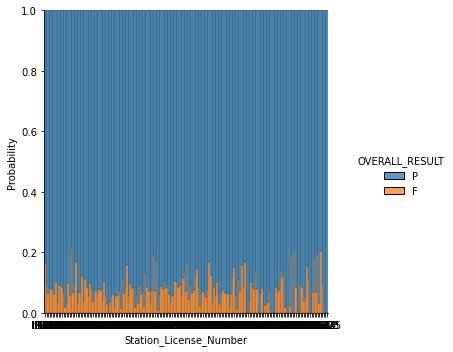

In [11]:
sns.displot(data=df, x='Station_License_Number', hue='OVERALL_RESULT', multiple='fill', discrete=True, stat='probability')

In [12]:
df['ZIP_CODE'].head(20)

0     87121
1     87108
2     87112
3     87119
4     87111
5     87123
6     87102
7     87110
8     87110
9     87107
10    87121
11    87105
12    87109
13    87120
14    87110
15    87120
16    87114
17    87113
18    87121
19    87107
Name: ZIP_CODE, dtype: object

In [13]:
df_sorted = df.sort_values(by='ZIP_CODE')

In [15]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 187503 entries, 166525 to 191701
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   VIN                     187503 non-null  object
 1   ZIP_CODE                187503 non-null  object
 2   OVERALL_RESULT          187503 non-null  object
 3   Station_License_Number  187503 non-null  object
dtypes: object(4)
memory usage: 7.2+ MB


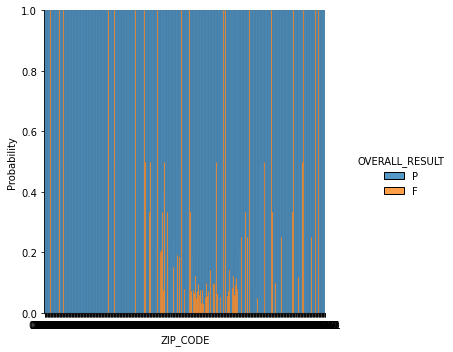

In [17]:
sns.displot(data=df_sorted, x='ZIP_CODE', hue='OVERALL_RESULT', multiple='fill', discrete=True, stat='probability')

In [19]:
#counts per zip code
df_sorted.groupby('ZIP_CODE').count()

,VIN,OVERALL_RESULT,Station_License_Number
ZIP_CODE,,,
01464,1,1,1
04104,1,1,1
06820,1,1,1
07801,1,1,1
08107,1,1,1
...,...,...,...
98123,2,2,2
98199,1,1,1
98661,1,1,1


In [20]:
df_sorted.groupby('Station_License_Number').count()

,VIN,ZIP_CODE,OVERALL_RESULT
Station_License_Number,,,
FG002,85,85,85
FG008,269,269,269
FG012,165,165,165
FG020,10,10,10
FG025,68,68,68
...,...,...,...
IS525,13,13,13
WW09,5,5,5
is420,3,3,3


In [ ]:
#normalize the station license number
#ignore invalid zip codes/ zip codes with low counts